In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflowjs as tfjs
print(tf.__version__)
print(pd.__version__)

2.9.0
1.5.3


In [2]:
df = pd.read_csv('fertilizer_amount_dataset.csv')
df.columns


Index(['P', 'hujan', 'curahhujan', 'jenistanaman', 'teksturtanah', 'area',
       'pupuk'],
      dtype='object')

In [23]:
df['jenistanaman'] = df['jenistanaman'].astype('category')
df['jenistanaman'] = df['jenistanaman'].cat.codes
df['teksturtanah'] = df['teksturtanah'].astype('category')
df['teksturtanah'] = df['teksturtanah'].cat.codes
df['curahhujan'] = df['curahhujan'].astype('category')
df['curahhujan'] = df['curahhujan'].cat.codes
df


KeyError: 'jenistanaman'

In [4]:

# convert categorical 'jenistanaman' data into one-hot data
jenistanaman = df.pop('jenistanaman')
df['Padi'] = (jenistanaman == 7)*1
df['Jagung'] = (jenistanaman == 1)*1
df['Kacang Merah'] = (jenistanaman == 4)*1
df['Kacang Hijau'] = (jenistanaman == 3)*1
df['Semangka'] = (jenistanaman == 8)*1
df['Melon'] = (jenistanaman == 6)*1
df['Apel'] = (jenistanaman == 0)*1
df['Jeruk'] = (jenistanaman == 2)*1
df['Kopi'] = (jenistanaman == 5)*1

# convert categorical 'teksturtanah' data into one-hot data
tt = df.pop('teksturtanah')
df['Lempung'] = (tt == 0)*1
df['Lempung Berpasir'] = (tt == 1)*1
df['Pasir Berlempung'] = (tt == 3)*1
df['Liat Berpasir'] = (tt == 2)*1

column_to_move = df.pop("pupuk")

# insert column with insert(location, column_name, column_value)

df.insert(0, "pupuk", column_to_move)
df



,pupuk,P,hujan,curahhujan,area,Padi,Jagung,Kacang Merah,Kacang Hijau,Semangka,Melon,Apel,Jeruk,Kopi,Lempung,Lempung Berpasir,Pasir Berlempung,Liat Berpasir
0,251,56,71.075622,1,17800,0,1,0,0,0,0,0,0,0,1,0,0,0
1,227,36,73.336361,0,19500,0,1,0,0,0,0,0,0,0,1,0,0,0
2,566,43,99.579812,0,28300,0,1,0,0,0,0,0,0,0,0,1,0,0
3,307,44,102.266244,0,14400,0,1,0,0,0,0,0,0,0,0,1,0,0
4,580,47,104.162615,0,25700,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1117,34,177.774507,0,17600,0,0,0,0,0,0,0,0,1,0,1,0,0
896,641,15,127.924610,0,12000,0,0,0,0,0,0,0,0,1,0,1,0,0
897,726,33,173.322839,0,16000,0,0,0,0,0,0,0,0,1,1,0,0,0
898,678,32,127.175293,0,15300,0,0,0,0,0,0,0,0,1,1,0,0,0


In [5]:
df = df.drop(columns=(['curahhujan','hujan','P']))
dataset = df.values
dataset

array([[  251, 17800,     0, ...,     0,     0,     0],
       [  227, 19500,     0, ...,     0,     0,     0],
       [  566, 28300,     0, ...,     1,     0,     0],
       ...,
       [  726, 16000,     0, ...,     0,     0,     0],
       [  678, 15300,     0, ...,     0,     0,     0],
       [  366, 10100,     0, ...,     0,     0,     0]], dtype=int64)

In [6]:
X = dataset[:, 1:]
y = dataset[:, 0:1]
X

array([[17800,     0,     1, ...,     0,     0,     0],
       [19500,     0,     1, ...,     0,     0,     0],
       [28300,     0,     1, ...,     1,     0,     0],
       ...,
       [16000,     0,     0, ...,     0,     0,     0],
       [15300,     0,     0, ...,     0,     0,     0],
       [10100,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [7]:
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[1.94654434e+04 1.11111090e-01 1.11111090e-01 1.11111090e-01
  1.11111090e-01 1.11111112e-01 1.11111104e-01 1.11111104e-01
  1.11111112e-01 1.11111119e-01 3.33333284e-01 4.51111138e-01
  1.08888872e-01 1.06666654e-01]]


In [8]:

def build_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(256, activation='relu', input_shape=[14]),
        layers.Dense(128, activation='relu'),
        #layers.Dropout(0.2), # biar ga overfit
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) #coba ganti Adam

    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse','mae'])
    
    return model


In [9]:
# def build_model():
#     model = keras.Sequential([
#         normalizer,
#         layers.Dense(256, activation='relu', input_shape=[14]),
#         layers.Dense(128, activation='relu'),
#         #layers.Dropout(0.3), # biar ga overfit
#         layers.Dense(64, activation='relu'),
#         layers.Dense(32, activation = 'relu'),
#         layers.Dense(1)
#     ])
#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #coba ganti Adam

#     model.compile(optimizer=optimizer,
#                   loss='mse',
#                   metrics=['mse','mae'])
    
#     return model

In [10]:
model = build_model()
#!pip install git+https://github.com/tensorflow/docs


In [11]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [12]:
EPOCHS = 4000
history = model.fit(X, y, epochs=EPOCHS, verbose = 0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1044054.3750,  mae:796.3835,  mse:1044054.3750,  
....................................................................................................
Epoch: 100, loss:21672.1836,  mae:97.2653,  mse:21672.1836,  
....................................................................................................
Epoch: 200, loss:21148.5195,  mae:96.2228,  mse:21148.5195,  
....................................................................................................
Epoch: 300, loss:21520.4297,  mae:96.5643,  mse:21520.4297,  
....................................................................................................
Epoch: 400, loss:20677.0254,  mae:94.2524,  mse:20677.0254,  
....................................................................................................
Epoch: 500, loss:20888.2070,  mae:94.7955,  mse:20888.2070,  
....................................................................................................
Epoch: 600, loss:2

29/29 [==============================] - 0s 1ms/step


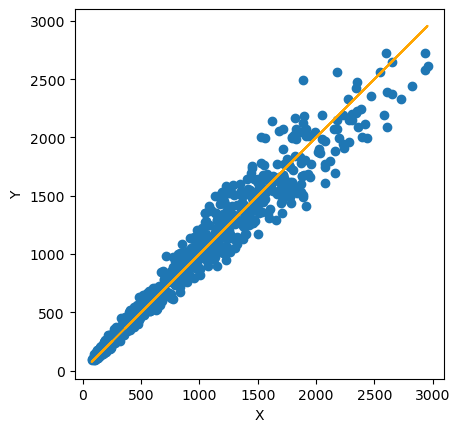

In [13]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y, test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(y,y,color='orange')

In [14]:
import numpy as np
# 989	    14100	                 0	0	0	0	0	1	0	0	0	0	0	0	1
# 2251.54	28200	                 0	0	0	0	0	0	1	0	0	0	0	0	1
# 91	    9500	                 0	0	0	1	0	0	0	0	0	1	0	0	0
model.predict(np.array([[14100,	 0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,  0,  1]]))
model.predict(np.array([[28200  ,    0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1],[14100,	 0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,  0,  1]]))
#df

1/1 [==============================] - 0s 23ms/step


array([[2717.5906 ],
       [ 965.09814]], dtype=float32)

In [15]:
from sklearn.metrics import r2_score
r2_score(y, test_predictions)
#test_predictions

0.9618745453250899

In [403]:
#tfjs.converters.save_keras_model(model, 'models')

In [404]:
model.save("model.h5")

In [405]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model


weight count with shape () and dtype int64 was auto converted to the type int32


2023-06-06 19:57:24.239189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-06 19:57:24.239693: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
#Export the saved model
import pathlib
import tflite as tflite

export_dir = 'fortflite/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: fortflite/assets


In [18]:
#Convert the model

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [21]:
#Save the model

tflite_model_file = pathlib.Path('mlmodel.tflite')
tflite_model_file.write_bytes(tflite_model)

183164

In [22]:
files.download(tflite_model_file)

NameError: name 'files' is not defined

In [409]:
import os
save_path = os.path.join("models/rps_model/1/")
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: models/rps_model/1/assets
